This exercise is for loan prediction

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
# Read the train and test dataset
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [6]:
# Determine the shape of our train dataset
data_train.shape

(614, 13)

In [8]:
# Determine the shape of our test dataset
data_test.shape

(367, 12)

In [97]:
# Determine the first five rows of our train dataset
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,1.0,Y
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0.0,N
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0,Y
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0,Y
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0,Y


In [10]:
# Determine the summary statistics of our train dataset
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# Determine the summary statistics of our test dataset
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [14]:
# Determine the number of null in each columns of our train dataset
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# Determine the number of null in each columns of our test dataset
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [18]:
# Determine the number of male and females in our train dataset
data_train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [19]:
# Determine the number of male and females in our test dataset
data_test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [29]:
# Replace missing values in gender with male
#data_train['Gender'].isnull() == 'male'
data_train['Gender'].fillna('Male')

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [96]:
# Replace missing values in Married with yes
data_train['Married'].fillna('Yes')
#convert training data to bitwise format
data_train['Married'].replace(to_replace='Yes',value=1,inplace=True)
data_train['Married'].replace(to_replace='No',value=0,inplace=True)
#convert testing data to bitwise format
data_test['Married'].replace(to_replace='Yes',value=1,inplace=True)
data_test['Married'].replace(to_replace='No',value=0,inplace=True)

In [31]:
# Replace missing values in Self_Employed with no
data_train['Self_Employed'].fillna('No')


0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

In [98]:
#Replace missing values in loan amount with median
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(),inplace=True)
data_test['LoanAmount'].fillna(data_test['LoanAmount'].median(),inplace=True)


In [38]:
# # Replace missing values in credit history with 2
data_train['Credit_History'].fillna(2)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [50]:
data_train['Gender'].replace(to_replace='Female',value=int(0),inplace=True)

In [99]:
# Replace the Male and female with 1 and 0 respectively
data_train['Gender'].replace(to_replace='Male',value=int(1),inplace=True)
data_train['Gender'].replace(to_replace='Female',value=int(0),inplace=True)
#Convert Gender to bitwise format
data_test['Gender'].replace(to_replace='Male',value=int(1),inplace=True)
data_test['Gender'].replace(to_replace='Female',value=int(0),inplace=True)

In [58]:
# Replace the yes and no with 1 and 0 respectively
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [103]:
# In Education columnn Replace the graduate and Not graduate with 1 and 0 respectively
data_train['Education'].replace(to_replace='Graduate', value='1',inplace=True)
data_train['Education'].replace(to_replace='Not Graduate',value='0',inplace=True)
data_train['Education']
#Convert Education column to bitwise format.
data_test['Education'].replace(to_replace='Graduate', value='1',inplace=True)
data_test['Education'].replace(to_replace='Not Graduate',value='0',inplace=True)
data_test['Education']

In [114]:
# in the self employed column Replace yes and no with 1 and 0 respectively
data_train['Self_Employed'].replace(to_replace='Yes', value=1, inplace=True)
data_train['Self_Employed'].replace(to_replace='No', value=0, inplace=True)
data_train['Self_Employed']
#Convert test self_employment data to bitwise
data_test['Self_Employed'].replace(to_replace='Yes',value=1, inplace=True)
data_test['Self_Employed'].replace(to_replace='No',value=0, inplace=True)

Text(0.5, 0, 'Loan_Status')

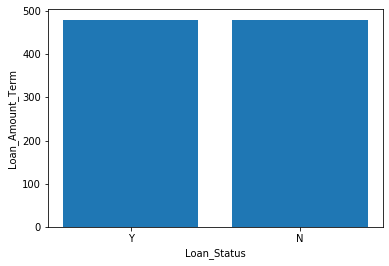

In [71]:
# Plot bar plot of loan status versus loan amount term
plt.bar(data_train['Loan_Status'], data_train['Loan_Amount_Term'])
plt.ylabel('Loan_Amount_Term')
plt.xlabel('Loan_Status')

In [104]:
data_train['Property_Area'].replace(to_replace='Urban', value=1,inplace=True)
data_train['Property_Area'].replace(to_replace='Rural', value=0,inplace=True)
data_train['Property_Area'].replace(to_replace='Semiurban',value=0.5,inplace=True)
#Convert test data property to bitwise
data_test['Property_Area'].replace(to_replace='Urban', value=1,inplace=True)
data_test['Property_Area'].replace(to_replace='Rural', value=0,inplace=True)
data_test['Property_Area'].replace(to_replace='Semiurban',value=0.5,inplace=True)



In [105]:
x_train = data_train.drop(columns=['Loan_ID','Loan_Status']) 
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,1.0
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0.0
610,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,0.0
611,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1.0
612,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1.0


In [106]:
y_train = data_train.drop(columns=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
y_train

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [120]:
#x_test = data_test.drop(columns=['Loan_ID','Loan_Status'])
int(data_test['Dependents'])
#x_test

TypeError: cannot convert the series to <class 'int'>

In [87]:
# Determine the probability of an applicant to be approved for a loan
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression
logmodel.fit(x_train, y_train)





TypeError: fit() missing 1 required positional argument: 'y'